# IMPORT PACKAGES


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mitosheet
from collections import Counter as c
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.metrics import confusion_matrix

# LOAD DATASET

In [10]:
kidney_disease = pd.read_csv(r'chronickidneydisease.csv')

In [11]:
kidney_disease.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Understanding Data Types and Summary

In [12]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
mitosheet.sheet(analysis_to_replay="id-njnfncueqg")
from mitosheet import *; register_analysis("id-mbhxbjdhfd");

In [19]:
# Renamed columns blood_pressure
kidney_disease.rename(columns={'bp': 'blood_pressure'}, inplace=True)

# Renamed columns specific_gravity
kidney_disease.rename(columns={'sg': 'specific_gravity'}, inplace=True)

# Renamed columns albumin
kidney_disease.rename(columns={'al': 'albumin'}, inplace=True)

# Renamed columns sugar
kidney_disease.rename(columns={'su': 'sugar'}, inplace=True)

# Renamed columns red_blood_cells
kidney_disease.rename(columns={'rbc': 'red_blood_cells'}, inplace=True)

# Renamed columns pus_cell
kidney_disease.rename(columns={'pc': 'pus_cell'}, inplace=True)

# Renamed columns pus_cell_clumps
kidney_disease.rename(columns={'pcc': 'pus_cell_clumps'}, inplace=True)

# Renamed columns bacteria
kidney_disease.rename(columns={'ba': 'bacteria'}, inplace=True)

# Renamed columns blood_glucose_random
kidney_disease.rename(columns={'bgr': 'blood_glucose_random'}, inplace=True)

# Renamed columns blood_urea
kidney_disease.rename(columns={'bu': 'blood_urea'}, inplace=True)

# Renamed columns serum_creatinine
kidney_disease.rename(columns={'sc': 'serum_creatinine'}, inplace=True)

# Renamed columns sodium
kidney_disease.rename(columns={'sod': 'sodium'}, inplace=True)

# Renamed columns pottassium
kidney_disease.rename(columns={'pot': 'pottassium'}, inplace=True)

# Renamed columns potassium
kidney_disease.rename(columns={'pottassium': 'potassium'}, inplace=True)

# Renamed columns hemoglobin
kidney_disease.rename(columns={'hemo': 'hemoglobin'}, inplace=True)

# Renamed columns haemoglobin
kidney_disease.rename(columns={'hemoglobin': 'haemoglobin'}, inplace=True)

# Renamed columns packed_cell_volume
kidney_disease.rename(columns={'pcv': 'packed_cell_volume'}, inplace=True)

# Renamed columns whiteblood_cells_count
kidney_disease.rename(columns={'wc': 'whiteblood_cells_count'}, inplace=True)

# Renamed columns white_blood_cells_count
kidney_disease.rename(columns={'whiteblood_cells_count': 'white_blood_cells_count'}, inplace=True)

# Renamed columns red_blood_cell_count
kidney_disease.rename(columns={'rc': 'red_blood_cell_count'}, inplace=True)

# Renamed columns hypertension
kidney_disease.rename(columns={'htn': 'hypertension'}, inplace=True)

# Renamed columns diabetes_melitus
kidney_disease.rename(columns={'dm': 'diabetes_melitus'}, inplace=True)

# Renamed columns coronary_artery_disease
kidney_disease.rename(columns={'cad': 'coronary_artery_disease'}, inplace=True)

# Renamed columns appetite
kidney_disease.rename(columns={'appet': 'appetite'}, inplace=True)

# Renamed columns anemia
kidney_disease.rename(columns={'ane': 'anemia'}, inplace=True)

# Renamed columns peda_edema
kidney_disease.rename(columns={'pe': 'peda_edema'}, inplace=True)


In [20]:
kidney_disease.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cells_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_melitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
       'anemia', 'classification'],
      dtype='object')

In [21]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [22]:
# converting required data's from object type to numeric type
kidney_disease['packed_cell_volume'] = pd.to_numeric(kidney_disease['packed_cell_volume'],errors="coerce")
kidney_disease['white_blood_cells_count'] = pd.to_numeric(kidney_disease['white_blood_cells_count'],errors="coerce")
kidney_disease['red_blood_cell_count'] = pd.to_numeric(kidney_disease['red_blood_cell_count'],errors="coerce")

In [23]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [24]:
# seperating nummerical and categorical data's
num_cols = []
for data in kidney_disease.columns:
    if kidney_disease[data].dtype!='object':
        num_cols.append(data)
print(num_cols)        
        

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cells_count', 'red_blood_cell_count']


In [25]:
cat_cols = []
for data in kidney_disease.columns:
    if kidney_disease[data].dtype=='object':
        cat_cols.append(data)
print(cat_cols)        
        

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_melitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'classification']


In [26]:
# get unique values from categorical data's

for data in cat_cols:
    print(f"{data} has {kidney_disease[data].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_melitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

classification has ['ckd' 'ckd\t' 'notckd'] values 



In [27]:
kidney_disease['diabetes_melitus'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
kidney_disease['coronary_artery_disease'].replace(to_replace='\tno' , value='no',inplace=True)
kidney_disease['classification'].replace(to_replace="ckd\t" ,value="ckd",inplace=True) 

In [28]:
from collections import Counter as c
# It shows the unique values in the coloumn
for data in cat_cols:
    print(f"{data} has {kidney_disease[data].unique()} values \n")
#checking count of values present
c(kidney_disease['diabetes_melitus'])
c(kidney_disease['coronary_artery_disease'])

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_melitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

classification has ['ckd' 'notckd'] values 



Counter({'no': 364, 'yes': 34, nan: 2})

In [29]:
# calculating the distribution among numerical data's using distplots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

nums_cols1 =['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 
            'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
            'packed_cell_volume', 'white_blood_cells_count',
            'red_blood_cell_count']
list(enumerate(nums_cols1))
#checking null values in data
kidney_disease.isnull().any()
kidney_disease.isnull().sum()
kidney_disease


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cells_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [30]:
kidney_disease

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cells_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


C:\Users\Gayathri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
NumExpr defaulting to 8 threads.
C:\Users\Gayathri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gayathri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

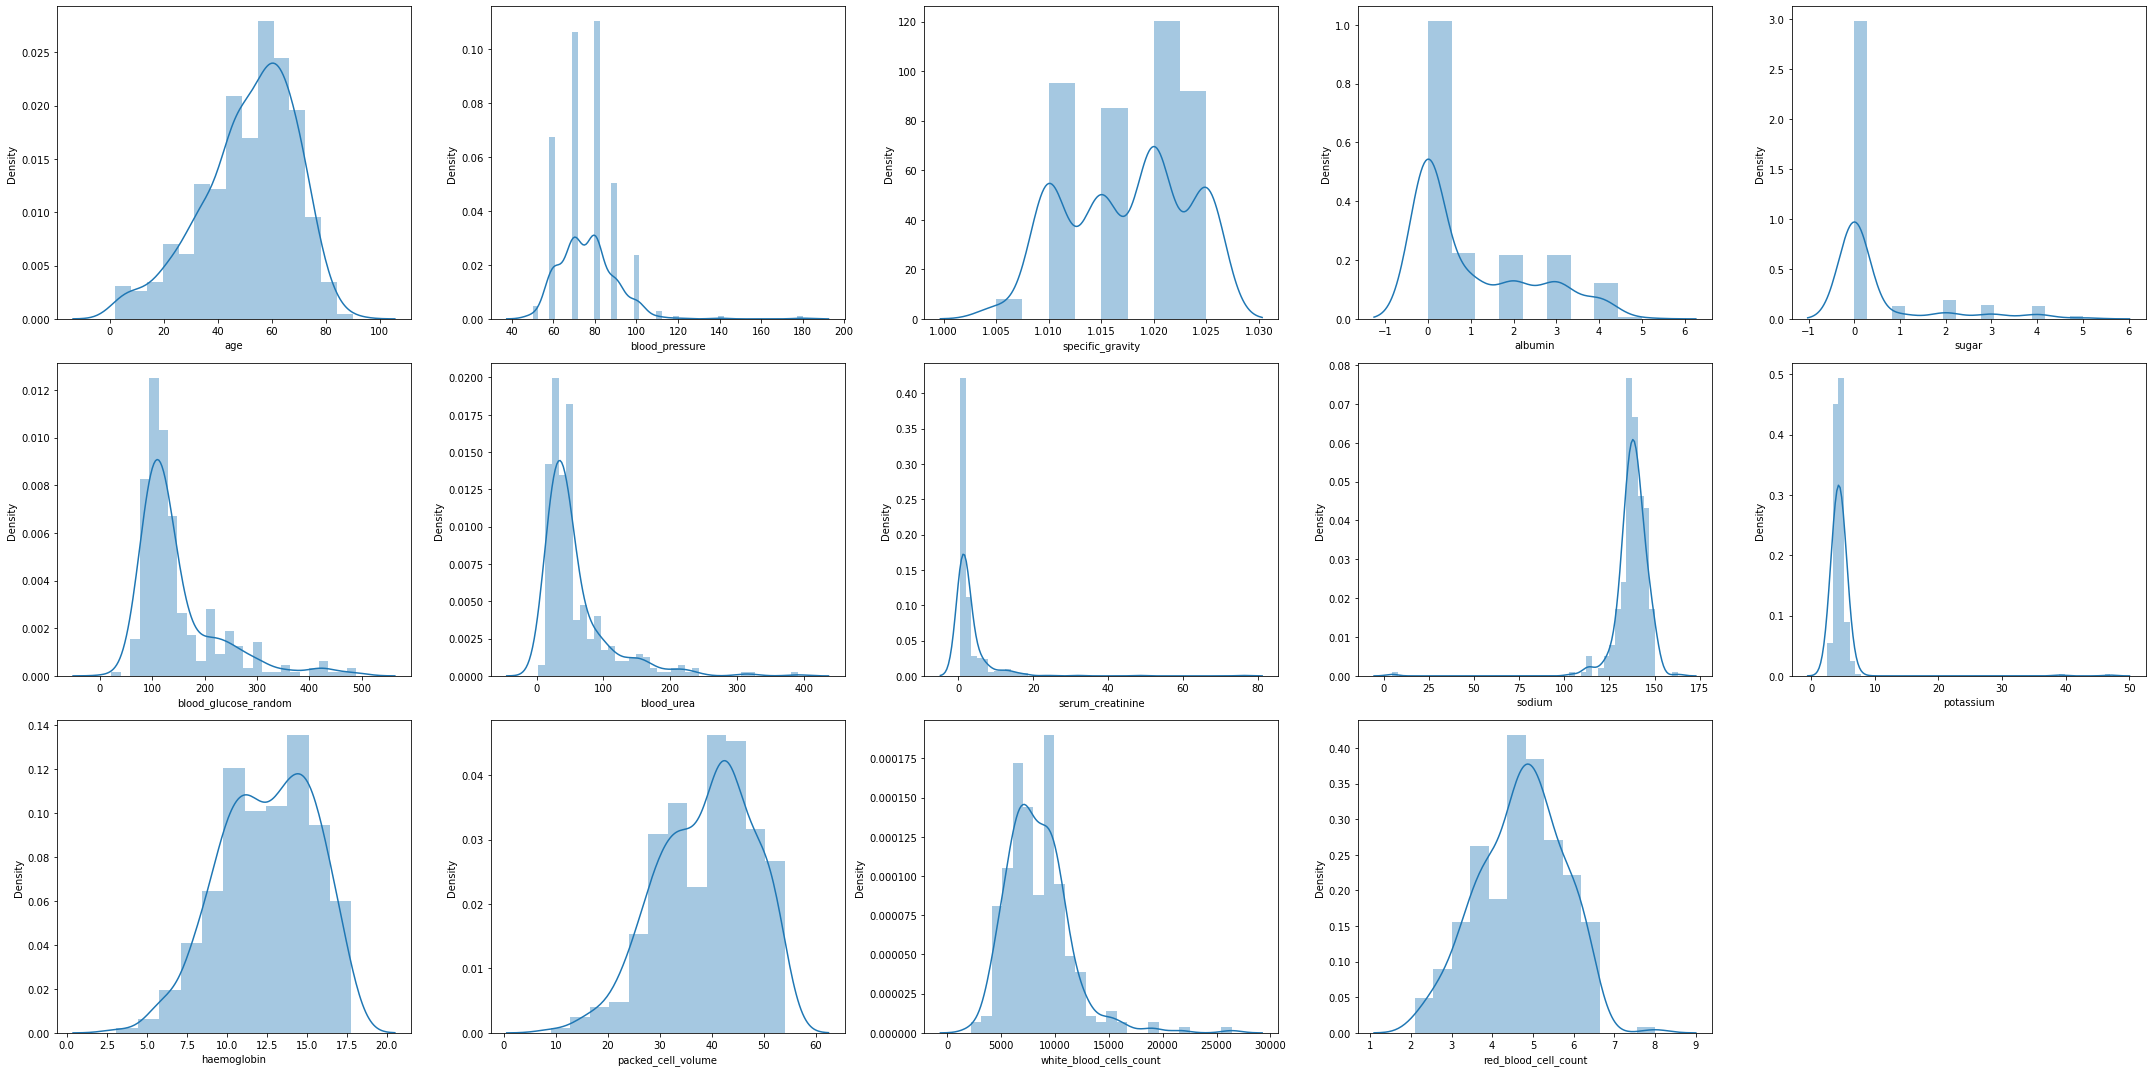

In [31]:
plt.figure(figsize = (30,15))
plotnumber =1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_disease[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [32]:
# To handle skewness in the data
def handle_skew(col):
     kidney_disease[col] =np.log1p(kidney_disease[col]) #An array with natural logarithmic value of x + 1,where x belongs to all elements of input array.
handle_skew("blood_urea")
handle_skew("serum_creatinine")
handle_skew("sodium")
handle_skew("potassium")
handle_skew("sugar")


C:\Users\Gayathri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gayathri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gayathri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

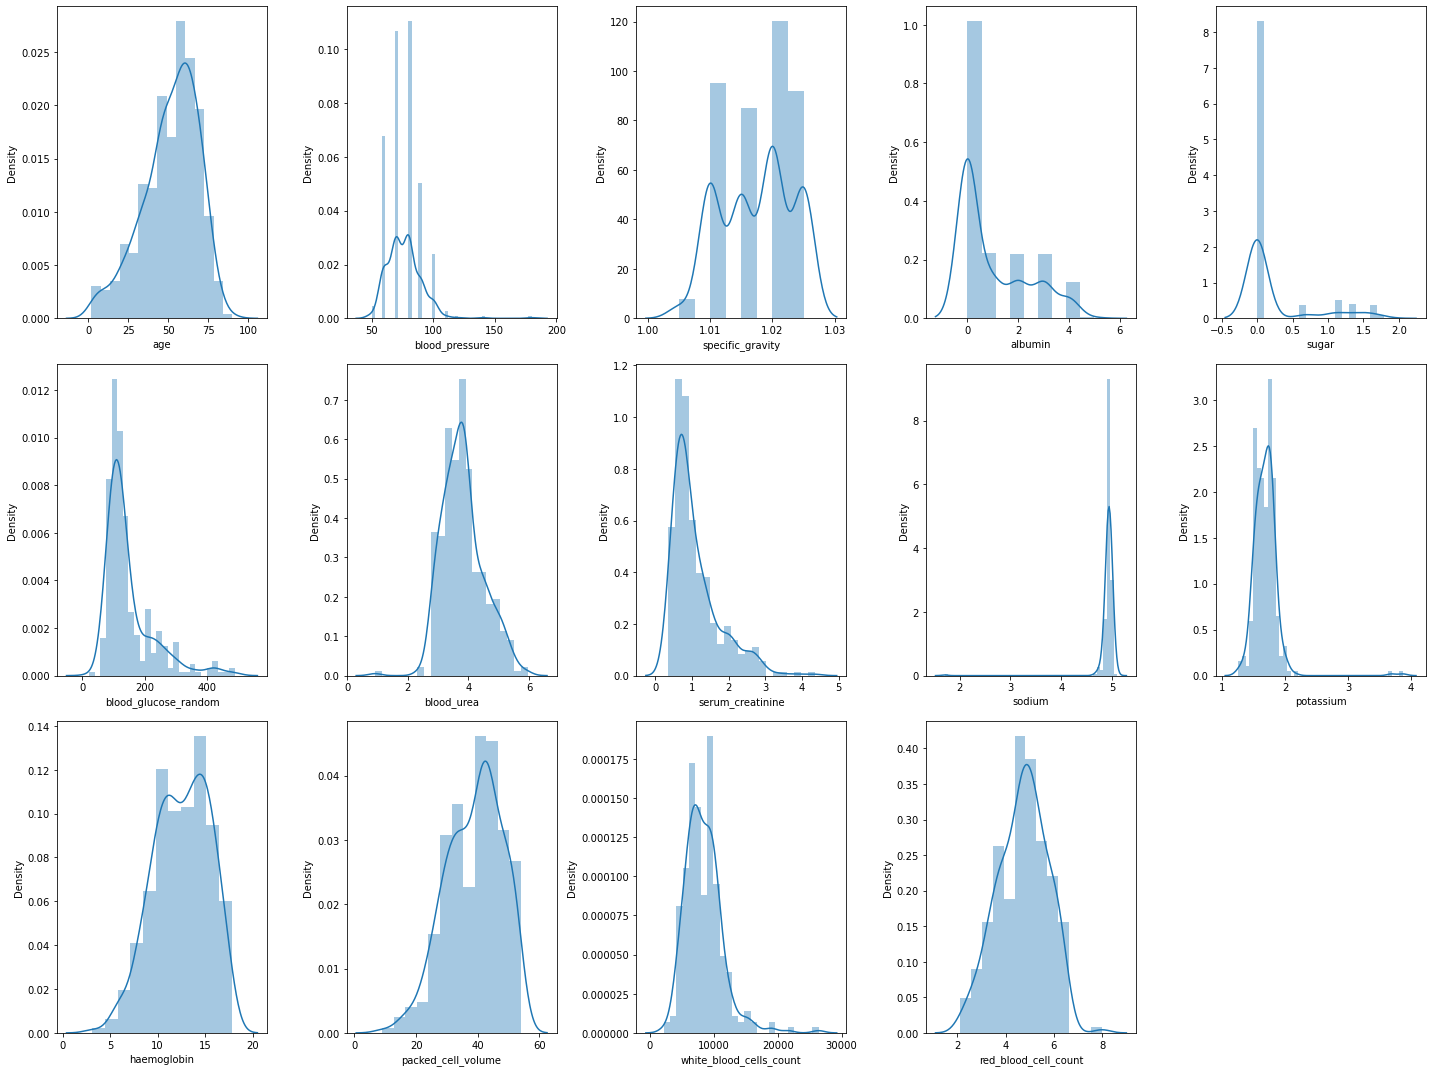

In [33]:
# seeing the distribution of data
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_disease[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [34]:
# some data's still possess skewness because of the null values in it
kidney_disease.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cells_count    106
red_blood_cell_count       131
hypertension                 2
diabetes_melitus             2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
classification               0
dtype: int64

In [35]:
#filling null values,1) more null values- using random sampling method 2)less null values using mean/mode
def random_sampling_value(inputs):
    random_sample = kidney_disease[inputs].dropna().sample(kidney_disease[inputs].isna().sum())
    random_sample.index = kidney_disease[kidney_disease[inputs].isnull()].index
    kidney_disease.loc[kidney_disease[inputs].isnull(),inputs] =random_sample
def value_mode(inputs):
    mode = kidney_disease[inputs].mode()[0]
    kidney_disease[inputs] =kidney_disease[inputs].fillna(mode)

In [36]:
for data in num_cols:
    random_sampling_value(data)
kidney_disease[num_cols].isnull().sum()    

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cells_count    0
red_blood_cell_count       0
dtype: int64

In [37]:
# label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for col in cat_cols:
    kidney_disease[col]= encode.fit_transform(kidney_disease[col])
kidney_disease.head()    

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cells_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.000000,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.000000,2,1,0,0,144.0,...,38.0,6000.0,3.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,1.386294,1,1,0,0,423.0,...,31.0,7500.0,4.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.000000,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.000000,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


# DATA SPLITTING
## Train and Test Set

In [38]:
# Date splitting
X = kidney_disease.drop(columns='classification', axis=1)
Y = kidney_disease['classification']

In [39]:
# Model selection

from sklearn.linear_model import Lasso #Least Absolute Shrinkage and Selection Operator

from sklearn.feature_selection import SelectFromModel

feture_el_model  = SelectFromModel(Lasso(alpha=0.005 ,random_state =42))

feture_el_model.fit(X,Y)
feture_el_model.get_support()

array([ True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True])

In [40]:
cols = X.columns
selected_features = cols[feture_el_model.get_support()]
print('total features {}'.format(X.shape[1]))
print('total features {}'.format(len(selected_features)))

total features 24
total features 17


In [41]:
X = X[selected_features]

#Train and splitting the data's
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state =42)